In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import pearsonr
from scipy.stats import shapiro

In [3]:
col_name=['sex','length','diameter','height','whole_weight','sucked_weight','viscera_weight','shell_weight','rings']

In [4]:
df=pd.read_csv('abalone.csv',names=col_name)

In [5]:
df

,sex,length,diameter,height,whole_weight,sucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## dataset info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   sucked_weight   4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.shape

(4177, 9)

## checking null values

In [7]:
total=df.isna().sum().sort_values(ascending=False)
percentage=(df.isna().sum()/df.shape[0]).sort_values(ascending=False)
table=pd.concat([total,percentage],axis=1)

In [8]:
table

,0,1
sex,0,0.0
length,0,0.0
diameter,0,0.0
height,0,0.0
whole_weight,0,0.0
sucked_weight,0,0.0
viscera_weight,0,0.0
shell_weight,0,0.0
rings,0,0.0


## No null values

In [11]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'sucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [9]:
df['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [12]:
df['length'].value_counts()

0.625    94
0.550    94
0.575    93
0.580    92
0.600    87
         ..
0.075     1
0.815     1
0.110     1
0.150     1
0.800     1
Name: length, Length: 134, dtype: int64

In [13]:
df['diameter'].value_counts()

0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.610      1
0.650      1
0.620      1
0.095      1
0.615      1
Name: diameter, Length: 111, dtype: int64

In [14]:
df['height'].value_counts()

0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.185    103
0.190    103
0.095     91
0.195     78
0.080     76
0.085     74
0.200     68
0.075     61
0.070     47
0.205     45
0.065     39
0.215     31
0.060     26
0.055     25
0.210     23
0.050     18
0.220     17
0.040     13
0.225     13
0.045     11
0.230     10
0.030      6
0.035      6
0.235      6
0.025      5
0.240      4
0.250      3
0.020      2
0.015      2
0.000      2
0.010      1
0.515      1
1.130      1
Name: height, dtype: int64

In [15]:
df['whole_weight'].value_counts()

0.2225    8
1.1345    7
0.9700    7
0.4775    7
0.1960    7
         ..
0.0475    1
1.8930    1
1.8725    1
2.1055    1
1.9485    1
Name: whole_weight, Length: 2429, dtype: int64

In [16]:
df['sucked_weight'].value_counts()

0.1750    11
0.2505    10
0.0970     9
0.0960     9
0.4190     9
          ..
0.4175     1
0.1935     1
0.1790     1
0.1275     1
0.9455     1
Name: sucked_weight, Length: 1515, dtype: int64

In [17]:
df['viscera_weight'].value_counts()

0.1715    15
0.1960    14
0.0575    13
0.0610    13
0.0370    13
          ..
0.4270     1
0.4075     1
0.4920     1
0.4650     1
0.5260     1
Name: viscera_weight, Length: 880, dtype: int64

In [18]:
df['shell_weight'].value_counts()

0.2750    43
0.2500    42
0.2650    40
0.3150    40
0.1850    40
          ..
0.0060     1
0.6460     1
0.5010     1
0.3295     1
0.0920     1
Name: shell_weight, Length: 926, dtype: int64

In [19]:
df['rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: rings, dtype: int64

## univariante analysis

In [35]:
def skew_and_kurtosis(x):
    s=skew(x,axis=0,bias=True)
    if s==0:
        print('normally distributed')
    if s<0:
        print('right tail distribution')
    else:
        print('left tail distribution')
    k=kurtosis(x,axis=0,bias=True)
    if k==0:
        print('normal distribution')
    if k<3:
        print('playkurtic')
    else:
        print('leptokurtic')
    return print('skewness :{0}  kurtosis{1}'.format(s,k))

In [30]:
def outliers(x):
    q1=x.quantile(0.25)
    q2=x.quantile(0.50)
    q3=x.quantile(0.75)
    iqr=q3-q1
    innerfence=q1-(iqr*1.5)
    outerfence=q3+(iqr*1.5)
    pos=[]
    out=[]
    
    for i,j in enumerate(x):
        if j < innerfence:
            pos.append(i)
            out.append(j)
        elif j > outerfence:
            pos.append(i)
            out.append(j)
    print('position :{0} and values :{1}'.format(pos,out))

In [41]:
def univariante(x):
    outliers(x)
    skew_and_kurtosis(x)
    s,p=shapiro(x)
    if p >0.05:
        print(x.name,'is normally distributed')
    else:
        print(x.name,'is not normally distributed')
    print('statistical value :{0} and probability value :{1}'.format(s,p))
    f,(ax1,ax2)=plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=df,x=x,ax=ax1)
    sns.histplot(data=df,x=x,ax=ax2,kde=True)

In [43]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'sucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

position :[148, 149, 236, 237, 238, 239, 305, 306, 321, 465, 523, 525, 526, 611, 694, 696, 718, 719, 720, 1053, 1054, 1055, 1056, 1210, 1429, 1824, 1986, 1987, 2114, 2115, 2169, 2171, 2343, 2371, 2380, 2381, 2458, 2711, 3141, 3143, 3190, 3318, 3380, 3472, 3600, 3837, 3899, 3902, 3994] and values :[0.175, 0.17, 0.075, 0.13, 0.11, 0.16, 0.2, 0.165, 0.19, 0.175, 0.2, 0.175, 0.155, 0.195, 0.165, 0.155, 0.18, 0.15, 0.16, 0.185, 0.195, 0.195, 0.2, 0.185, 0.14, 0.185, 0.135, 0.16, 0.13, 0.18, 0.165, 0.19, 0.17, 0.18, 0.175, 0.155, 0.2, 0.19, 0.18, 0.2, 0.2, 0.165, 0.19, 0.165, 0.175, 0.17, 0.14, 0.16, 0.185]
right tail distribution
playkurtic
skewness :-0.6396434615451078  kurtosis0.06310755265972467
length is not normally distributed
statistical value :0.9696492552757263 and probability value :7.377629143455696e-29


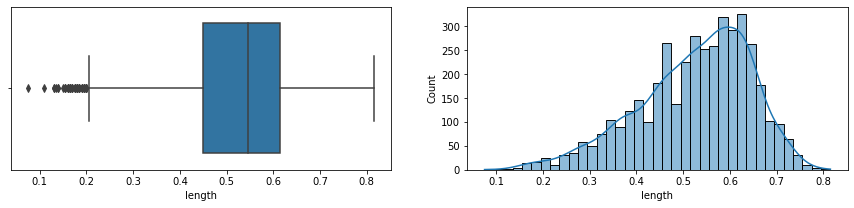

In [42]:
univariante(df['length'])

position :[43, 44, 148, 149, 236, 237, 238, 239, 305, 306, 321, 465, 520, 523, 525, 526, 611, 694, 696, 718, 719, 720, 892, 898, 1053, 1054, 1055, 1429, 1824, 1986, 1987, 1988, 2114, 2115, 2169, 2171, 2172, 2343, 2371, 2380, 2381, 2458, 2545, 2711, 2712, 3141, 3143, 3190, 3318, 3380, 3472, 3473, 3521, 3600, 3716, 3837, 3899, 3902, 3994] and values :[0.15, 0.15, 0.13, 0.13, 0.055, 0.1, 0.09, 0.12, 0.145, 0.12, 0.145, 0.125, 0.15, 0.14, 0.125, 0.11, 0.145, 0.11, 0.105, 0.125, 0.1, 0.11, 0.14, 0.12, 0.13, 0.15, 0.135, 0.105, 0.135, 0.13, 0.11, 0.15, 0.095, 0.13, 0.115, 0.13, 0.15, 0.125, 0.125, 0.135, 0.115, 0.145, 0.15, 0.14, 0.15, 0.135, 0.15, 0.145, 0.125, 0.13, 0.12, 0.15, 0.15, 0.125, 0.13, 0.105, 0.105, 0.12, 0.135]
right tail distribution
playkurtic
skewness :-0.6089793517180232  kurtosis-0.04685725781261718
diameter is not normally distributed
statistical value :0.970473051071167 and probability value :1.6414551656441721e-28


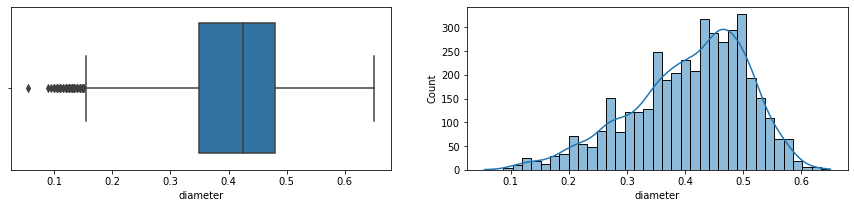

In [44]:
univariante(df['diameter'])

position :[236, 237, 238, 239, 306, 694, 718, 719, 720, 1174, 1257, 1417, 1428, 1429, 1763, 1987, 2051, 2114, 2169, 2171, 2172, 2179, 2381, 2711, 3190, 3837, 3899, 3902, 3996] and values :[0.01, 0.03, 0.03, 0.035, 0.03, 0.02, 0.035, 0.025, 0.025, 0.015, 0.0, 0.515, 0.25, 0.035, 0.25, 0.025, 1.13, 0.035, 0.015, 0.03, 0.03, 0.25, 0.025, 0.03, 0.025, 0.035, 0.035, 0.02, 0.0]
left tail distribution
leptokurtic
skewness :3.127693679207538  kurtosis75.93309871329375
height is not normally distributed
statistical value :0.8896051645278931 and probability value :0.0


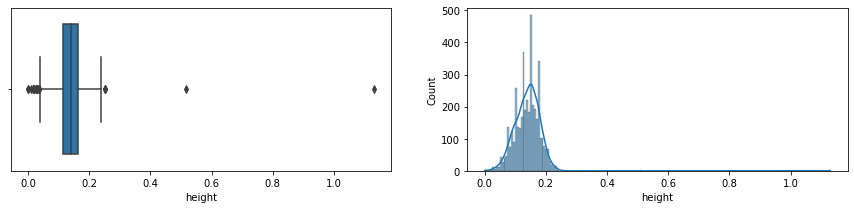

In [45]:
univariante(df['height'])

position :[165, 358, 891, 1051, 1052, 1193, 1206, 1207, 1209, 1426, 1427, 1428, 1761, 1762, 1763, 2265, 2334, 2623, 2624, 2811, 2862, 2863, 3007, 3008, 3188, 3427, 3599, 3715, 3800, 3993] and values :[2.55, 2.499, 2.8255, 2.555, 2.302, 2.273, 2.236, 2.505, 2.657, 2.25, 2.5085, 2.255, 2.2205, 2.5155, 2.7795, 2.226, 2.526, 2.381, 2.398, 2.3305, 2.2355, 2.3235, 2.2305, 2.2635, 2.2695, 2.4925, 2.333, 2.548, 2.381, 2.2385]
left tail distribution
playkurtic
skewness :0.5307678720133928  kurtosis-0.025051305562984627
whole_weight is not normally distributed
statistical value :0.9722852110862732 and probability value :1.0143092052495122e-27


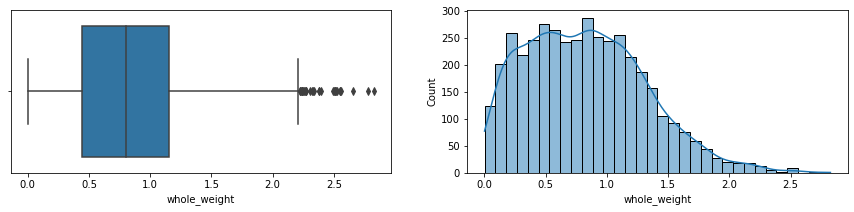

In [46]:
univariante(df['whole_weight'])

position :[165, 891, 1048, 1051, 1052, 1193, 1197, 1199, 1202, 1206, 1207, 1209, 1417, 1418, 1426, 1427, 1527, 1528, 1749, 1750, 1754, 1756, 1761, 1762, 1763, 1821, 1982, 2544, 2623, 2624, 2625, 2675, 2710, 2810, 2811, 2862, 2863, 2970, 2972, 3007, 3082, 3427, 3599, 3713, 3715, 3961, 3962, 3993] and values :[1.0705, 1.1465, 1.012, 1.1335, 1.007, 1.095, 1.0465, 1.0265, 1.026, 1.109, 1.1965, 1.488, 1.1075, 1.0465, 1.1565, 1.232, 1.017, 1.351, 0.9895, 0.9925, 1.1455, 1.03, 1.083, 1.1155, 1.3485, 1.0715, 1.0815, 1.0685, 0.9915, 1.128, 1.0515, 1.005, 1.0615, 1.1055, 1.253, 1.1705, 1.1495, 0.9815, 0.9955, 1.2395, 1.0135, 1.1455, 1.2395, 1.2455, 1.1945, 1.133, 1.0745, 0.984]
left tail distribution
playkurtic
skewness :0.7188396611678955  kurtosis0.5929754415645077
sucked_weight is not normally distributed
statistical value :0.962066650390625 and probability value :9.362563887244321e-32


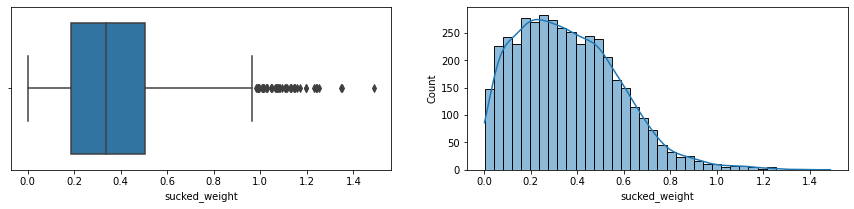

In [47]:
univariante(df['sucked_weight'])

position :[170, 1048, 1052, 1204, 1206, 1207, 1209, 1422, 1427, 1750, 1757, 1759, 1762, 1763, 2334, 2623, 2624, 2709, 2710, 2810, 2811, 2863, 3427, 3628, 3715, 4148] and values :[0.541, 0.5225, 0.509, 0.55, 0.5195, 0.513, 0.4985, 0.564, 0.519, 0.4925, 0.5195, 0.5185, 0.6415, 0.76, 0.59, 0.5005, 0.512, 0.5265, 0.5235, 0.525, 0.541, 0.5115, 0.575, 0.5145, 0.5745, 0.526]
left tail distribution
playkurtic
skewness :0.5916395905344537  kurtosis0.08247512417945213
viscera_weight is not normally distributed
statistical value :0.9681379199028015 and probability value :1.774917175594725e-29


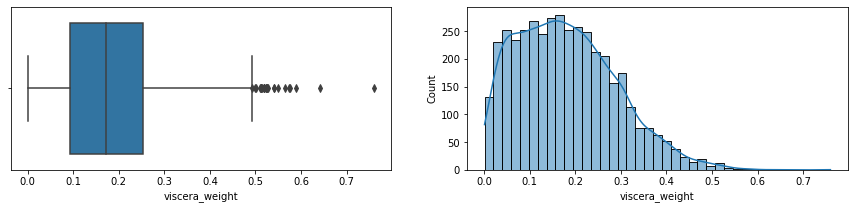

In [48]:
univariante(df['viscera_weight'])

position :[81, 129, 157, 163, 164, 165, 166, 167, 168, 277, 334, 358, 891, 1193, 1207, 1428, 1761, 1762, 1823, 1985, 2090, 2108, 2157, 2161, 2208, 2274, 2368, 3008, 3148, 3149, 3151, 3188, 3715, 3928, 4145] and values :[0.675, 0.78, 0.635, 1.005, 0.815, 0.725, 0.85, 0.65, 0.76, 0.69, 0.71, 0.7, 0.897, 0.638, 0.6785, 0.7975, 0.63, 0.642, 0.643, 0.646, 0.6585, 0.885, 0.725, 0.885, 0.665, 0.685, 0.66, 0.726, 0.6855, 0.71, 0.725, 0.665, 0.6745, 0.655, 0.657]
left tail distribution
playkurtic
skewness :0.6207038222275745  kurtosis0.5298535134982196
shell_weight is not normally distributed
statistical value :0.9704266786575317 and probability value :1.568463383716868e-28


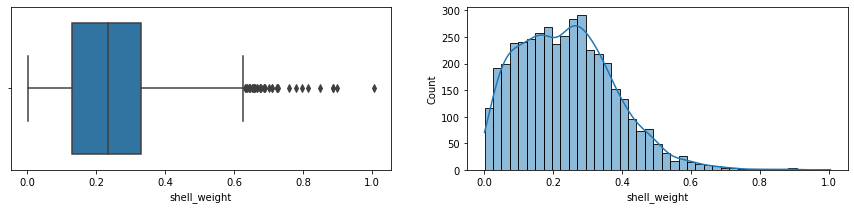

In [49]:
univariante(df['shell_weight'])

position :[6, 7, 9, 32, 33, 36, 72, 82, 83, 128, 129, 130, 142, 157, 163, 164, 166, 167, 181, 197, 232, 236, 237, 238, 240, 256, 270, 271, 275, 277, 278, 287, 290, 293, 294, 306, 310, 312, 313, 314, 318, 334, 337, 351, 354, 355, 357, 358, 359, 360, 362, 363, 365, 369, 370, 371, 372, 375, 407, 416, 417, 418, 426, 427, 428, 429, 430, 431, 432, 433, 442, 447, 449, 450, 451, 452, 468, 469, 475, 477, 478, 479, 480, 481, 483, 494, 497, 501, 504, 509, 520, 526, 530, 550, 570, 572, 573, 579, 582, 592, 593, 599, 600, 613, 621, 623, 628, 642, 656, 657, 658, 660, 664, 671, 672, 673, 674, 675, 678, 683, 687, 699, 719, 720, 725, 734, 743, 744, 745, 746, 754, 756, 761, 762, 769, 811, 882, 891, 894, 1054, 1429, 1957, 2090, 2101, 2108, 2115, 2138, 2151, 2155, 2157, 2160, 2161, 2176, 2180, 2181, 2199, 2201, 2202, 2203, 2208, 2209, 2210, 2211, 2213, 2221, 2233, 2237, 2262, 2270, 2275, 2277, 2305, 2307, 2313, 2315, 2324, 2334, 2335, 2336, 2338, 2339, 2344, 2345, 2348, 2351, 2352, 2353, 2357, 2358, 2362, 

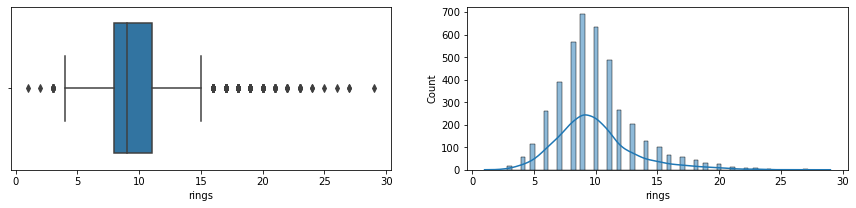

In [50]:
univariante(df['rings'])

## describe

In [52]:
df['length'].describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: length, dtype: float64

In [53]:
df['diameter'].describe()

count    4177.000000
mean        0.407881
std         0.099240
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: diameter, dtype: float64

In [54]:
df['height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: height, dtype: float64

## No chances of abalone having a height of 0


In [55]:
df['whole_weight'].describe()

count    4177.000000
mean        0.828742
std         0.490389
min         0.002000
25%         0.441500
50%         0.799500
75%         1.153000
max         2.825500
Name: whole_weight, dtype: float64

In [56]:
df['sucked_weight'].describe()

count    4177.000000
mean        0.359367
std         0.221963
min         0.001000
25%         0.186000
50%         0.336000
75%         0.502000
max         1.488000
Name: sucked_weight, dtype: float64

In [57]:
df['viscera_weight'].describe()

count    4177.000000
mean        0.180594
std         0.109614
min         0.000500
25%         0.093500
50%         0.171000
75%         0.253000
max         0.760000
Name: viscera_weight, dtype: float64

In [58]:
df['shell_weight'].describe()

count    4177.000000
mean        0.238831
std         0.139203
min         0.001500
25%         0.130000
50%         0.234000
75%         0.329000
max         1.005000
Name: shell_weight, dtype: float64

In [59]:
df['rings'].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: rings, dtype: float64

## checking the height o values

In [61]:
df[df['height']==0]

,sex,length,diameter,height,whole_weight,sucked_weight,viscera_weight,shell_weight,rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


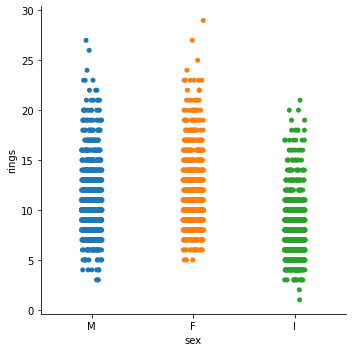

In [63]:
sns.catplot(data=df,x='sex',y='rings')

<AxesSubplot:title={'center':'rings'}, xlabel='sex'>

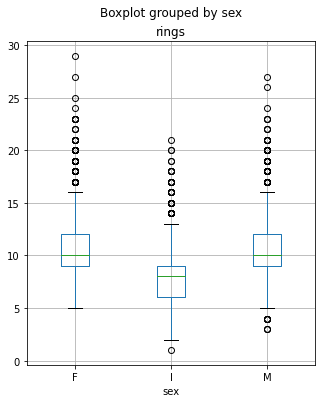

In [64]:
df.boxplot(column='rings',by='sex',figsize=[5,6])

In [66]:
df

,sex,length,diameter,height,whole_weight,sucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## bivariante analysis

<AxesSubplot:xlabel='length', ylabel='rings'>

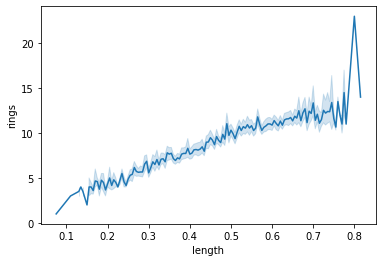

In [69]:
sns.lineplot(data=df,x='length',y='rings')

<AxesSubplot:xlabel='length', ylabel='rings'>

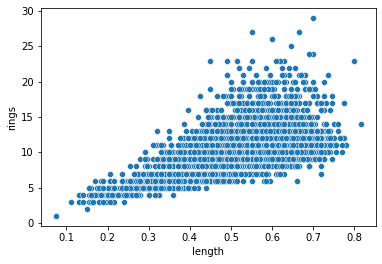

In [73]:
sns.scatterplot(data=df,x='length',y='rings')

<AxesSubplot:xlabel='diameter', ylabel='rings'>

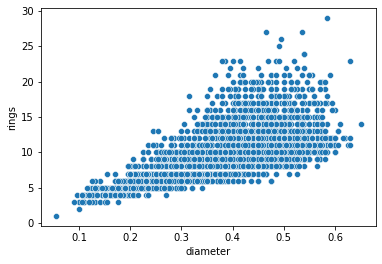

In [74]:
sns.scatterplot(data=df,x='diameter',y='rings')

<AxesSubplot:xlabel='height', ylabel='rings'>

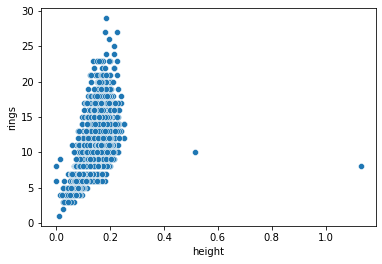

In [75]:
sns.scatterplot(data=df,x='height',y='rings')

In [76]:
df['height'].value_counts()

0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.185    103
0.190    103
0.095     91
0.195     78
0.080     76
0.085     74
0.200     68
0.075     61
0.070     47
0.205     45
0.065     39
0.215     31
0.060     26
0.055     25
0.210     23
0.050     18
0.220     17
0.040     13
0.225     13
0.045     11
0.230     10
0.030      6
0.035      6
0.235      6
0.025      5
0.240      4
0.250      3
0.020      2
0.015      2
0.000      2
0.010      1
0.515      1
1.130      1
Name: height, dtype: int64

<AxesSubplot:xlabel='whole_weight', ylabel='rings'>

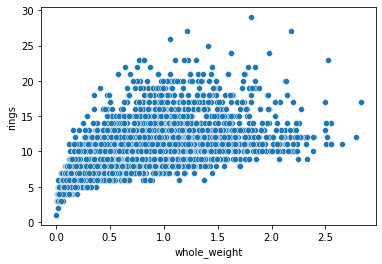

In [77]:
sns.scatterplot(data=df,x='whole_weight',y='rings')

##  comparsion with whole weight

<AxesSubplot:xlabel='length', ylabel='whole_weight'>

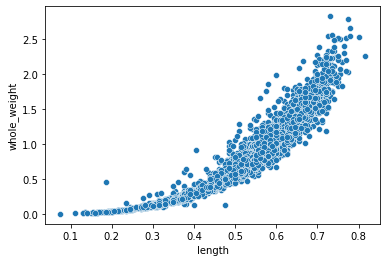

In [78]:
sns.scatterplot(data=df,y='whole_weight',x='length')

## when abalone lenght increases the whole weight also increases gradually


<AxesSubplot:xlabel='diameter', ylabel='whole_weight'>

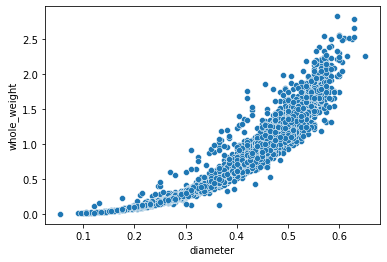

In [79]:
sns.scatterplot(data=df,y='whole_weight',x='diameter')

## when abalone diameter increases the whole weight also increases gradually

<AxesSubplot:xlabel='height', ylabel='whole_weight'>

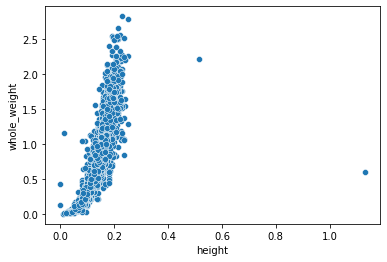

In [80]:
sns.scatterplot(data=df,y='whole_weight',x='height')

## Here abalone height lies between the range of 0.01 to 0.2
## when height increases meanwhile abalone whole weight also increases

## comparison with rings

<AxesSubplot:xlabel='height', ylabel='rings'>

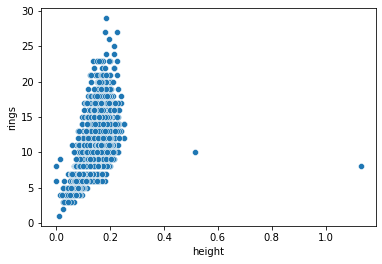

In [82]:
sns.scatterplot(data=df,y='rings',x='height')

<AxesSubplot:xlabel='diameter', ylabel='rings'>

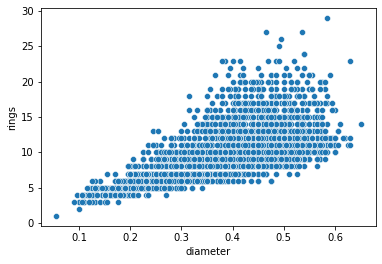

In [83]:
sns.scatterplot(data=df,y='rings',x='diameter')

<AxesSubplot:xlabel='length', ylabel='rings'>

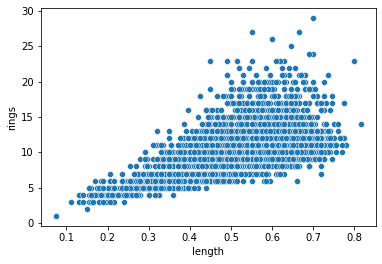

In [81]:
sns.scatterplot(data=df,y='rings',x='length')

## here age increases along with length,diameter,height

<AxesSubplot:xlabel='length', ylabel='rings'>

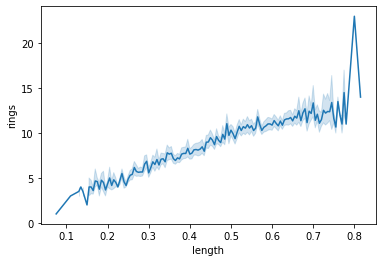

In [84]:
sns.lineplot(data=df,x='length',y='rings')

<AxesSubplot:xlabel='diameter', ylabel='rings'>

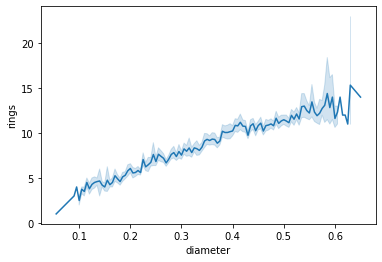

In [85]:
sns.lineplot(data=df,x='diameter',y='rings')

<AxesSubplot:xlabel='height', ylabel='rings'>

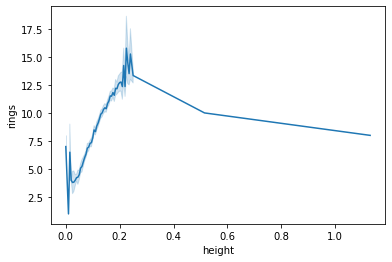

In [86]:
sns.lineplot(data=df,x='height',y='rings')

In [7]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'sucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='shell_weight'>

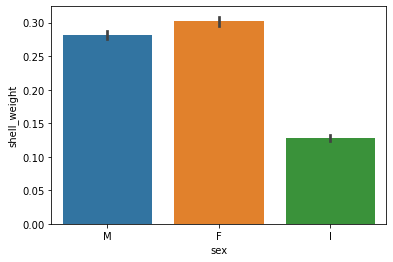

In [8]:
sns.barplot(x='sex',y='shell_weight',data=df)

# conclusion:

1.) male abalone age lies between 9 to 12
2.) female abalone age lies between 9 to 12
3.) infant abalone age lies between 6 to 9
4.) max survival age of abalone is 15 rings
5.) the height of the abalone lies between 0.01 to 0.2
6.) length,height,diameter,wholeweight increases which results the abalone age is also increased
7.) if the diameter of the abalone is > 0.28 then it's female  